In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [67]:
df_test = pd.read_csv('data/Test.csv')
df_train = pd.read_csv('data/Train.csv')

#### columns

- **DATOP** - Date of flight  
- **FLTID** - Flight number  
- **DEPSTN** - Departure point  
- **ARRSTN** - Arrival point  
- **STD** - Scheduled Time departure  
- **STA** - Scheduled Time arrival  
- **STATUS** - Flight status  
- **AC** - Aircraft Code  

In [ ]:
df_test.head()

In [15]:
df_train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [16]:
df_train['STATUS'].unique()

array(['ATA', 'DEP', 'RTR', 'SCH', 'DEL'], dtype=object)

In [8]:
df_train.isnull().sum()

ID        0
DATOP     0
FLTID     0
DEPSTN    0
ARRSTN    0
STD       0
STA       0
STATUS    0
AC        0
target    0
dtype: int64

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [10]:
df_train.describe().round(2)

,target
count,107833.00
mean,48.73
std,117.14
min,0.00
25%,0.00
50%,14.00
75%,43.00
max,3451.00


In [11]:
df_train.nunique()

ID        107833
DATOP       1011
FLTID       1861
DEPSTN       132
ARRSTN       128
STD        81697
STA        85136
STATUS         5
AC            68
target       968
dtype: int64

In [ ]:

df_train['STD'] = pd.to_datetime(df_train['STD'])

# replace periods with colons in the STA column to fix the datetime format
df_train['STA'] = df_train['STA'].str.replace('.', ':', regex=False)
df_train['STA'] = pd.to_datetime(df_train['STA'])

# year, month, day, and time for STD and STA
df_train['STD_year'] = df_train['STD'].dt.year
df_train['STD_month'] = df_train['STD'].dt.month
df_train['STD_day'] = df_train['STD'].dt.day

df_train['STA_year'] = df_train['STA'].dt.year
df_train['STA_month'] = df_train['STA'].dt.month
df_train['STA_day'] = df_train['STA'].dt.day

In [ ]:
# flight duration in minutes
duration = (df_train['STA'] - df_train['STD']).dt.total_seconds() / 60
df_train['duration'] = duration


In [71]:
# Add day of the week and month name columns
df_train['STD_day_of_week'] = df_train['STD'].dt.day_name()
df_train['STA_day_of_week'] = df_train['STA'].dt.day_name()
df_train['STD_month_name'] = df_train['STD'].dt.month_name()
df_train['STA_month_name'] = df_train['STA'].dt.month_name()

In [73]:
# Extract the hour of the day from STD and STA columns
df_train['STD_hour'] = df_train['STD'].dt.hour
df_train['STA_hour'] = df_train['STA'].dt.hour

# Display the updated DataFrame
df_train[['STD', 'STD_hour', 'STA', 'STA_hour','STD_day_of_week','STA_day_of_week','STD_month_name','STA_month_name','STA_month']].head()

,STD,STD_hour,STA,STA_hour,STD_day_of_week,STA_day_of_week,STD_month_name,STA_month_name,STA_month
0,2016-01-03 10:30:00,10,2016-01-03 12:55:00,12,Sunday,Sunday,January,January,1
1,2016-01-13 15:05:00,15,2016-01-13 16:55:00,16,Wednesday,Wednesday,January,January,1
2,2016-01-16 04:10:00,4,2016-01-16 06:45:00,6,Saturday,Saturday,January,January,1
3,2016-01-17 14:10:00,14,2016-01-17 17:00:00,17,Sunday,Sunday,January,January,1
4,2016-01-17 14:30:00,14,2016-01-17 15:50:00,15,Sunday,Sunday,January,January,1


In [ ]:
# Map days of the week to numbers (
day_of_week_mapping = {
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 
    'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7
}

df_train['STD_day_of_week_encoded'] = df_train['STD_day_of_week'].map(day_of_week_mapping)
df_train['STA_day_of_week_encoded'] = df_train['STA_day_of_week'].map(day_of_week_mapping)

In [120]:
df_train['log_target'] = np.log1p(df_train['target'])
df_train['log_duration'] =  np.log1p(df_train['duration'])

<Axes: xlabel='log_duration', ylabel='Count'>

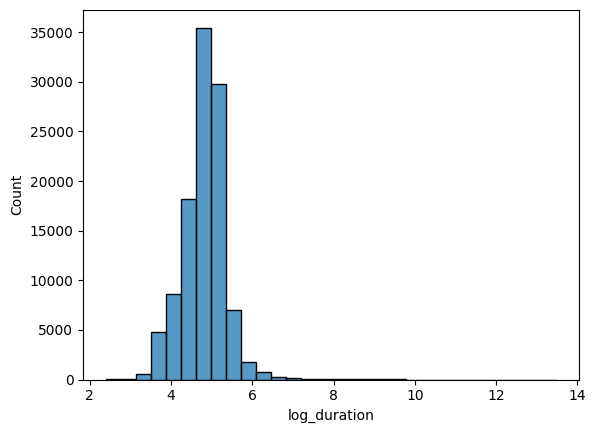

In [124]:
sns.histplot(df_train['log_duration'], bins=30)

In [129]:
# Define a function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Apply the function to create a new column for seasons
df_train['season'] = df_train['STD_month'].apply(get_season)
df_train[['STD_month', 'season']].head()

,STD_month,season
0,1,Winter
1,1,Winter
2,1,Winter
3,1,Winter
4,1,Winter


In [154]:
# Define a function to categorize hours
def categorize_hour(hour):
    if 6 <= hour < 12:
        return '6 - 12 AM'
    elif 12 <= hour < 18:
        return '12 - 18 PM'
    elif 18 <= hour < 24:
        return '18 - 24 PM'
    else:
        return '0 - 6 AM'

# Apply the function to categorize STD_hour and STA_hour
df_train['STD_hour_category'] = df_train['STD_hour'].apply(categorize_hour)
df_train['STA_hour_category'] = df_train['STA_hour'].apply(categorize_hour)

# Display the updated DataFrame
df_train[['STD_hour', 'STD_hour_category', 'STA_hour', 'STA_hour_category']].head()

,STD_hour,STD_hour_category,STA_hour,STA_hour_category
0,10,6 - 12 AM,12,12 - 18 PM
1,15,12 - 18 PM,16,12 - 18 PM
2,4,0 - 6 AM,6,6 - 12 AM
3,14,12 - 18 PM,17,12 - 18 PM
4,14,12 - 18 PM,15,12 - 18 PM


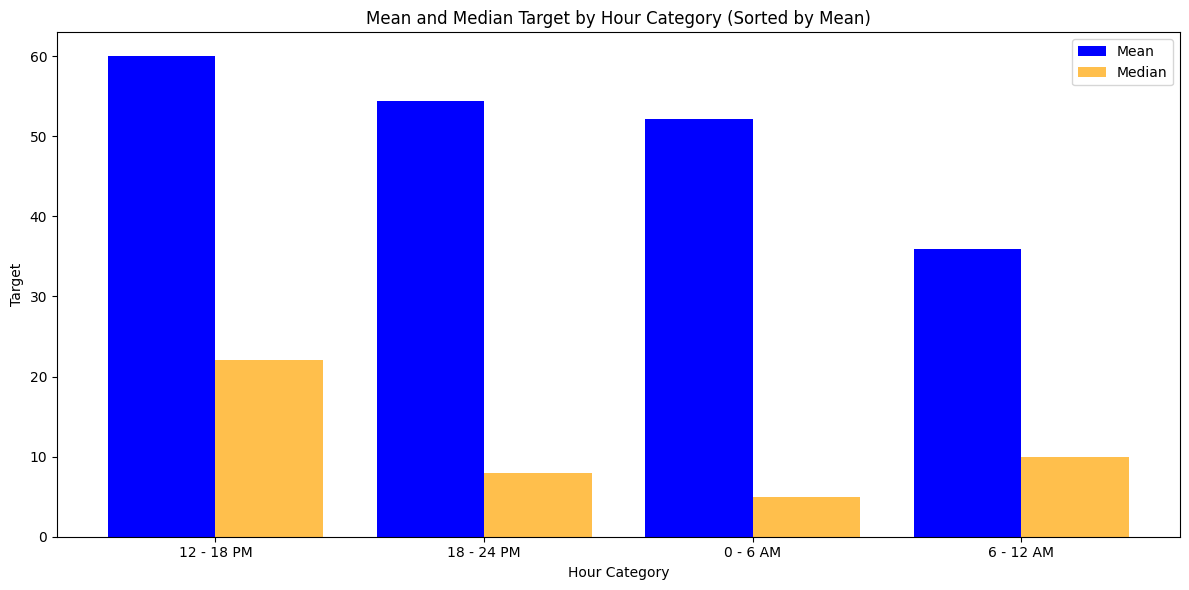

In [185]:
# Group by STD_hour_category and calculate the mean and median of the target
std_hour_category_stats = df_train.groupby('STD_hour_category')['target'].agg(['mean', 'median'])
hour_category_sorted = std_hour_category_stats.sort_values(by='mean', ascending=False)

# Create a bar plot for the mean and median target by hour category
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size for better readability

# Define the x-axis positions based on the sorted data
x_positions = np.arange(len(hour_category_sorted))

# Bar plot for mean
ax.bar(x_positions - 0.2, hour_category_sorted['mean'], width=0.4, label='Mean', color='blue', align='center')

# Bar plot for median
ax.bar(x_positions + 0.2, hour_category_sorted['median'], width=0.4, label='Median', color='orange', alpha=0.7, align='center')

# Set labels and title
ax.set_xlabel('Hour Category')
ax.set_ylabel('Target')
ax.set_title('Mean and Median Target by Hour Category (Sorted by Mean)')

# Set the x-ticks and labels using the sorted hour category index
ax.set_xticks(x_positions)
ax.set_xticklabels(hour_category_sorted.index)  # Use the index of the sorted DataFrame

ax.legend()
plt.tight_layout()
plt.show()


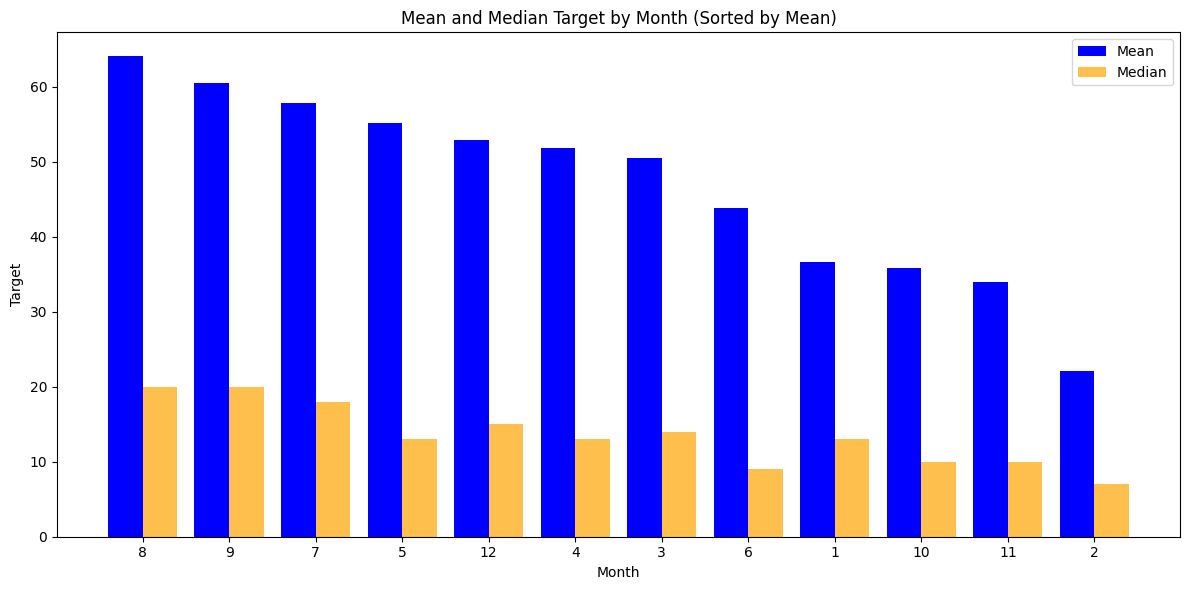

In [178]:
# Group by STD_month and calculate the mean and median of the target
std_month_stats = df_train.groupby('STD_month')['target'].agg(['mean', 'median'])
month_sorted = std_month_stats.sort_values(by='mean', ascending=False)

# Create a bar plot for the mean and median target by month
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size for better readability

# Define the x-axis positions based on the sorted data
x_positions = np.arange(len(month_sorted))

# Bar plot for mean
ax.bar(x_positions - 0.2, month_sorted['mean'], width=0.4, label='Mean', color='blue', align='center')

# Bar plot for median
ax.bar(x_positions + 0.2, month_sorted['median'], width=0.4, label='Median', color='orange', alpha=0.7, align='center')

# Set labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Target')
ax.set_title('Mean and Median Target by Month (Sorted by Mean)')

# Set the x-ticks and labels using the sorted month index
ax.set_xticks(x_positions)
ax.set_xticklabels(month_sorted.index)  # Use the index of the sorted DataFrame

ax.legend()
plt.tight_layout()
plt.show()


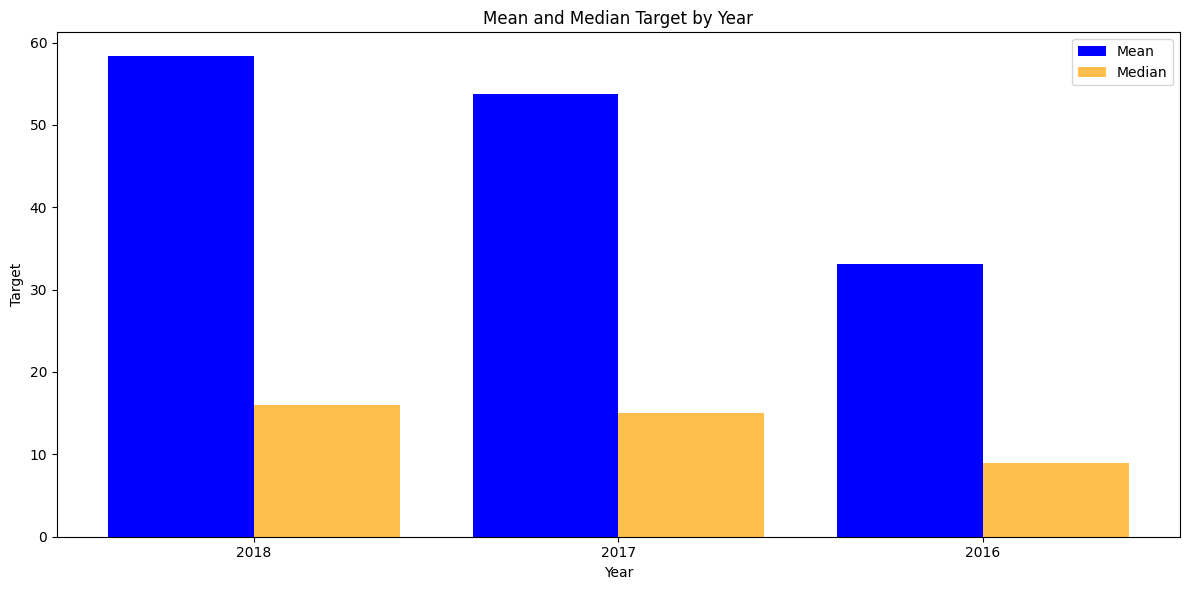

In [179]:
# Group by year and calculate the mean and median of the target
year_stats = df_train.groupby('STD_year')['target'].agg(['mean', 'median'])
year_sorted = year_stats.sort_values(by='mean', ascending=False)

# Create a bar plot for the mean and median target by year
fig, ax = plt.subplots(figsize=(12, 6))

x_positions = np.arange(len(year_sorted))

# Bar plot for mean
ax.bar(x_positions - 0.2, year_sorted['mean'], width=0.4, label='Mean', color='blue', align='center')

# Bar plot for median
ax.bar(x_positions + 0.2, year_sorted['median'], width=0.4, label='Median', color='orange', alpha=0.7, align='center')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Target')
ax.set_title('Mean and Median Target by Year')
ax.legend()

ax.set_xticks(x_positions)
ax.set_xticklabels(year_sorted.index)

plt.tight_layout()
plt.show()



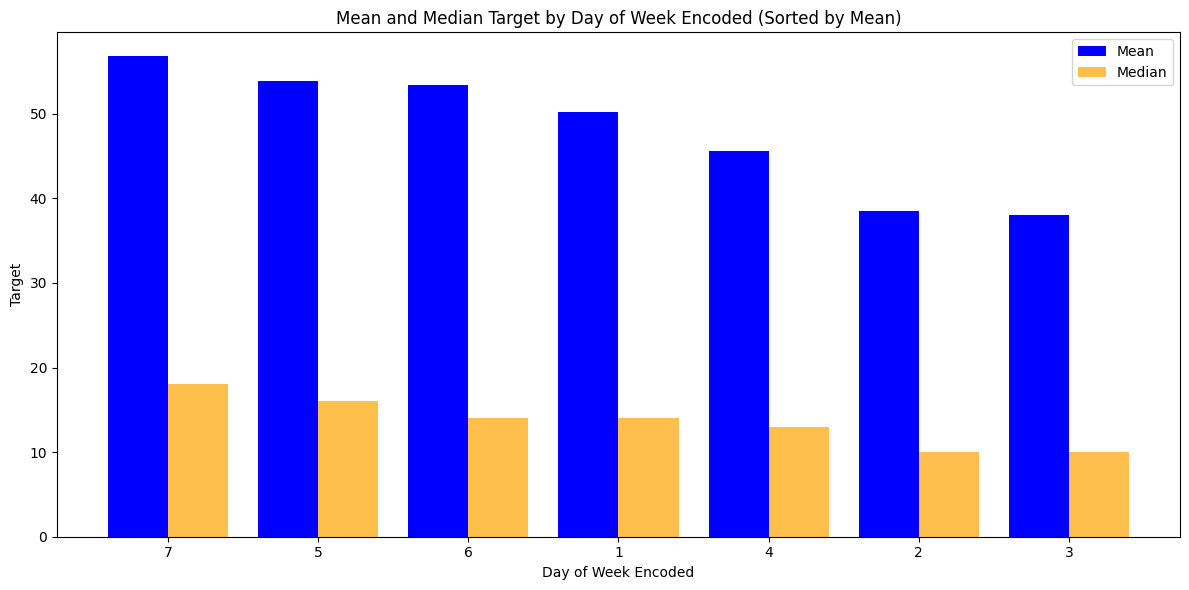

In [182]:
#
# Sort the day_of_week_stats DataFrame by the 'mean' column in descending order
day_of_week_stats = df_train.groupby('STD_day_of_week_encoded')['target'].agg(['mean', 'median'])
day_of_week_stats_sorted = day_of_week_stats.sort_values(by='mean', ascending=False)

# Create a bar plot for the mean and median target by day of the week encoded
fig, ax = plt.subplots(figsize=(12, 6))

x_positions = np.arange(len(day_of_week_stats_sorted))

# Bar plot for mean
ax.bar(x_positions - 0.2, day_of_week_stats_sorted['mean'], width=0.4, label='Mean', color='blue', align='center')

# Bar plot for median
ax.bar(x_positions + 0.2, day_of_week_stats_sorted['median'], width=0.4, label='Median', color='orange', alpha=0.7, align='center')

# Set labels and title
ax.set_xlabel('Day of Week Encoded')
ax.set_ylabel('Target')
ax.set_title('Mean and Median Target by Day of Week Encoded (Sorted by Mean)')
ax.legend()

ax.set_xticks(x_positions)
ax.set_xticklabels(day_of_week_stats_sorted.index)

plt.tight_layout()
plt.show()

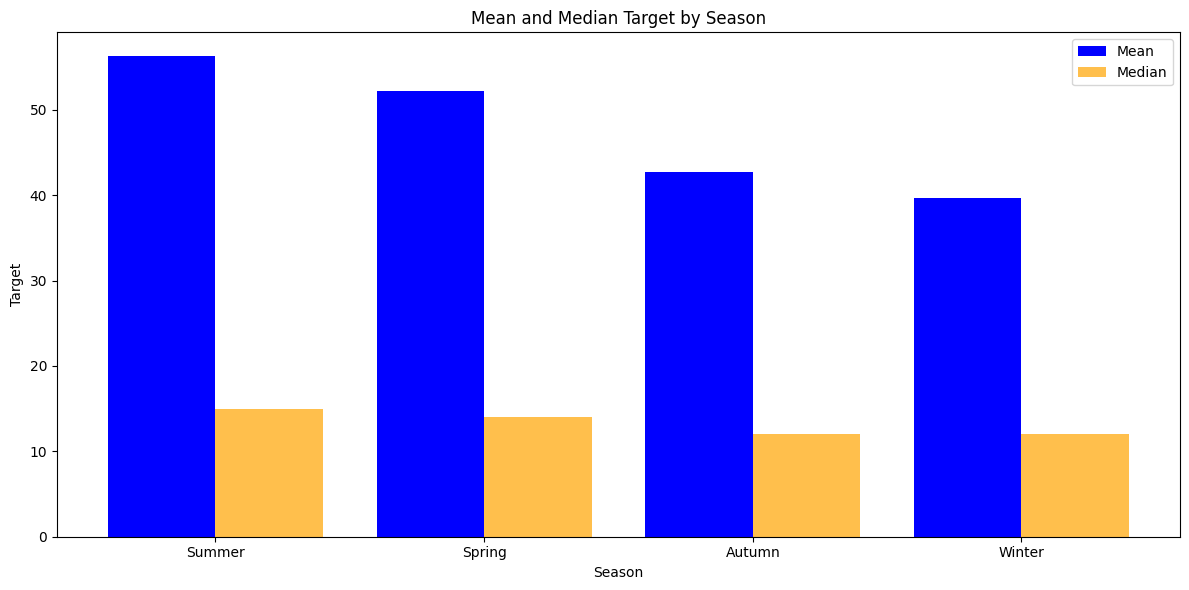

In [184]:
# Group by season and calculate the mean and median of the target
season_stats = df_train.groupby('season')['target'].agg(['mean', 'median'])
season_sorted = season_stats.sort_values(by='mean', ascending=False)

# Create a bar plot for the mean and median target by season
fig, ax = plt.subplots(figsize=(12, 6))

# Convert the index to a numeric range for plotting
x_positions = np.arange(len(season_sorted))

# Bar plot for mean
ax.bar(x_positions - 0.2, season_sorted['mean'], width=0.4, label='Mean', color='blue', align='center')

# Bar plot for median
ax.bar(x_positions + 0.2, season_sorted['median'], width=0.4, label='Median', color='orange', alpha=0.7, align='center')

# Set the x-axis tick labels to the season names
ax.set_xticks(x_positions)
ax.set_xticklabels(season_sorted.index)

# Set labels and title
ax.set_xlabel('Season')
ax.set_ylabel('Target')
ax.set_title('Mean and Median Target by Season')
ax.legend()

plt.tight_layout()
plt.show()